### Домашнее задание №1 Создание и нормализация базы данных 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-mcfe{background-color:#F9F8FA;color:#181818;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-4bv2{background-color:#FFF;color:#181818;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-rpr9{background-color:#F9F8FA;color:#313131;font-weight:bold;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-4bv2"><span style="font-weight:bold">Тема домашней работы</span></th>
    <th class="tg-4bv2"><span style="font-weight:600;color:#181818">Создание и нормализация базы данных.</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-mcfe"><span style="font-weight:bold">Цель домашней работы</span></td>
    <td class="tg-mcfe"><span style="font-weight:600;color:#181818">Научиться создавать базы данных и нормализовать их.</span></td>
  </tr>
  <tr>
    <td class="tg-4bv2"><span style="font-weight:bold">Формулировка задания</span></td>
    <td class="tg-4bv2"><span style="font-weight:600;color:#181818">Дан файл с данными по клиентам и транзакциям:</span> <a href="https://lms.skillfactory.ru/asset-v1:SkillFactory+MFTIDS+SEP2023+type@asset+block@customer_and_transaction__2_.xlsx"><span style="font-weight:inherit;font-style:inherit;text-decoration:none;color:#0075B4">customer_and_transaction.xlsx</span></a><span style="font-weight:600;color:#181818">.</span><br><span style="font-weight:bold">Необходимо выполнить следующие пункты:</span><br><span style="font-weight:bold">(2 балла)</span> Продумать структуру базы данных и <a href="https://dbdiagram.io/home?utm_source=holistics&utm_medium=top_5_tools_blog"><span style="font-weight:inherit;font-style:inherit;text-decoration:none;color:#0075B4">отрисовать в редакторе</span></a>.<br><span style="font-weight:bold">(2 балла)</span> Нормализовать базу данных (1НФ — 3НФ), описав, к какой нормальной форме приводится таблица и почему таблица в этой нормальной форме изначально не находилась.<br><span style="font-weight:bold">(3 балла)</span> Создать все таблицы в DBeaver, указав первичные ключи к таблицам, правильные типы данных, могут ли поля быть пустыми или нет (использовать команду CREATE TABLE).<br><span style="font-weight:bold">(3 балла)</span> Загрузить данные в таблицы в соответствии с созданной структурой (использовать команду INSERT INTO или загрузить файлы, используя возможности инструмента DBeaver; в случае загрузки файлами приложить скрины, что данные действительно были залиты).</td>
  </tr>
  <tr>
    <td class="tg-mcfe"><span style="font-weight:bold">Обратите внимание</span></td>
    <td class="tg-rpr9">В итоге количество таблиц может отличаться от количества листов в Excel.<br>Можно загрузить не все данные, а какую-то маленькую выборку для быстроты и удобства.</td>
  </tr>
  <tr>
    <td class="tg-4bv2"><span style="font-weight:bold">Как отправить задание на проверку</span></td>
    <td class="tg-4bv2"><span style="font-weight:600;color:#181818">Загрузите файл(ы) в GitHub, в форму приложите ссылку на него. Назовите файл(ы) вашим ФИО.</span></td>
  </tr>
  <tr>
    <td class="tg-mcfe"><span style="font-weight:bold">Что нужно отправить</span></td>
    <td class="tg-rpr9">Ссылку на репозиторий, в котором будут ноутбук в Jupyter с решением или sql-скрипты на PostgreSQL со скринами из DBeaver.<br>Скрин базы данных с пункта 1 и описание с пункта 2 можно отправить отдельным документом или же вставить в ноутбук в начале работы.</td>
  </tr>
</tbody>
</table>

## Решение: 

### Исходные данные:

Изначально в исходном документе Excel были даны две таблицы со следующими колонками:

Таблица transactions:

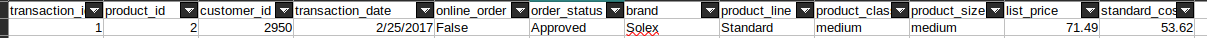

Таблица customers:
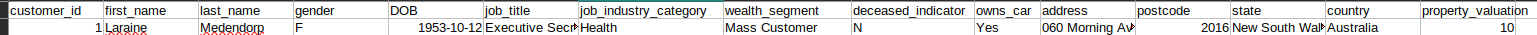

---
##### Изучение таблиц Excel с данными при помощи pandas

In [55]:
import pandas as pd
import openpyxl

Считаем таблицу с транзакциями в датафрейм

In [56]:
transaction_df = pd.read_excel('HW_customers_transactions.xlsx')
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48


In [57]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    20000 non-null  int64         
 1   product_id        20000 non-null  int64         
 2   customer_id       20000 non-null  int64         
 3   transaction_date  20000 non-null  datetime64[ns]
 4   online_order      19640 non-null  object        
 5   order_status      20000 non-null  object        
 6   brand             19803 non-null  object        
 7   product_line      19803 non-null  object        
 8   product_class     19803 non-null  object        
 9   product_size      19803 non-null  object        
 10  list_price        20000 non-null  float64       
 11  standard_cost     19803 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 1.8+ MB


Считаем таблицу с покупателями в датафрейм

In [58]:
customers_df = pd.read_excel('HW_customers_transactions.xlsx', 1)
customers_df.head()

,customer_id,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Talbot,NaN,Male,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,Sheila-kathryn,Calton,Female,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,9 Oakridge Court,3216,VIC,Australia,9


In [59]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            4000 non-null   int64 
 1   first_name             4000 non-null   object
 2   last_name              3875 non-null   object
 3   gender                 4000 non-null   object
 4   DOB                    3913 non-null   object
 5   job_title              3494 non-null   object
 6   job_industry_category  3344 non-null   object
 7   wealth_segment         4000 non-null   object
 8   deceased_indicator     4000 non-null   object
 9   owns_car               4000 non-null   object
 10  address                4000 non-null   object
 11  postcode               4000 non-null   int64 
 12  state                  4000 non-null   object
 13  country                4000 non-null   object
 14  property_valuation     4000 non-null   int64 
dtypes: int64(3), object(1

In [60]:
transaction_df.describe(include='object')

,online_order,order_status,brand,product_line,product_class,product_size
count,19640,20000,19803,19803,19803,19803
unique,2,2,6,4,3,3
top,True,Approved,Solex,Standard,medium,medium
freq,9829,19821,4253,14176,13826,12990


Выделим отдельно датафрейм с колонками, относящимися к продуктам

In [61]:
products_df = transaction_df[['product_id', 'brand', 'product_line', 'product_class', 'product_size', 'list_price', 'standard_cost']]
products_df.head()

,product_id,brand,product_line,product_class,product_size,list_price,standard_cost
0,2,Solex,Standard,medium,medium,71.49,53.62
1,3,Trek Bicycles,Standard,medium,large,2091.47,388.92
2,37,OHM Cycles,Standard,low,medium,1793.43,248.82
3,88,Norco Bicycles,Standard,medium,medium,1198.46,381.10
4,78,Giant Bicycles,Standard,medium,large,1765.30,709.48


In [62]:
products_df.shape

(20000, 7)

Проверим уникальность колонки product_id

In [63]:
products_df[products_df['product_id'] == 0].value_counts().sort_values(ascending=False)

product_id  brand           product_line  product_class  product_size  list_price  standard_cost
0           Solex           Standard      medium         medium        71.49       53.620000        80
            Norco Bicycles  Standard      medium         medium        360.40      270.300000       65
            WeareA2B        Standard      medium         medium        60.34       45.260000        64
            Norco Bicycles  Standard      low            medium        363.01      290.410000       61
            Giant Bicycles  Standard      medium         medium        230.91      173.180000       58
            Norco Bicycles  Road          medium         medium        543.39      407.540000       57
                                                                       544.05      376.840000       57
            Trek Bicycles   Road          medium         medium        533.51      400.130000       57
            OHM Cycles      Standard      high           medium        227.88  

Для product_id = 0 имеются очень много комбинаций, следовательно product_id не может быть уникальным ключем

In [64]:
products_df.drop_duplicates().shape

(399, 7)

Итого 399 продуктов с уникальной комбинацией параметров.

In [65]:
products_df[products_df['product_id'] == 0].drop_duplicates()

,product_id,brand,product_line,product_class,product_size,list_price,standard_cost
34,0,Norco Bicycles,Road,medium,medium,544.05,376.84
54,0,Norco Bicycles,Standard,low,medium,363.01,290.41
60,0,OHM Cycles,Road,high,large,12.01,7.21
63,0,Trek Bicycles,Standard,medium,medium,499.53,388.72
82,0,OHM Cycles,Standard,medium,medium,235.63,125.07
...,...,...,...,...,...,...,...
19340,0,NaN,NaN,NaN,NaN,744.54,NaN
19383,0,NaN,NaN,NaN,NaN,1098.18,NaN
19793,0,NaN,NaN,NaN,NaN,868.56,NaN
19859,0,NaN,NaN,NaN,NaN,1497.43,NaN


Из 399 уникальных комбинаций продуктов аж 233 принадлежат продуктам с product_id = 0.

In [66]:
products_df[products_df['product_id'] != 0].drop_duplicates().sort_values('product_id')

,product_id,brand,product_line,product_class,product_size,list_price,standard_cost
186,1,Giant Bicycles,Touring,medium,large,1873.97,863.95
31,1,Giant Bicycles,Standard,medium,medium,1403.50,954.82
0,2,Solex,Standard,medium,medium,71.49,53.62
218,2,Giant Bicycles,Road,low,small,590.26,525.33
1,3,Trek Bicycles,Standard,medium,large,2091.47,388.92
...,...,...,...,...,...,...,...
123,98,OHM Cycles,Standard,medium,medium,795.34,101.58
523,99,OHM Cycles,Standard,medium,medium,1227.34,770.89
33,99,Trek Bicycles,Road,low,small,1720.70,1531.42
889,100,Trek Bicycles,Standard,medium,small,1386.84,1234.29


Из 399 уникальных комбинаций всего 176 принадлежат продуктам с product_id != 0.

In [67]:
products_df[products_df['product_id'] == 0].drop_duplicates()

,product_id,brand,product_line,product_class,product_size,list_price,standard_cost
34,0,Norco Bicycles,Road,medium,medium,544.05,376.84
54,0,Norco Bicycles,Standard,low,medium,363.01,290.41
60,0,OHM Cycles,Road,high,large,12.01,7.21
63,0,Trek Bicycles,Standard,medium,medium,499.53,388.72
82,0,OHM Cycles,Standard,medium,medium,235.63,125.07
...,...,...,...,...,...,...,...
19340,0,NaN,NaN,NaN,NaN,744.54,NaN
19383,0,NaN,NaN,NaN,NaN,1098.18,NaN
19793,0,NaN,NaN,NaN,NaN,868.56,NaN
19859,0,NaN,NaN,NaN,NaN,1497.43,NaN


In [68]:
products_df[(products_df['product_id'] == 0) & (products_df['standard_cost'].notna())].drop_duplicates()

,product_id,brand,product_line,product_class,product_size,list_price,standard_cost
34,0,Norco Bicycles,Road,medium,medium,544.05,376.840000
54,0,Norco Bicycles,Standard,low,medium,363.01,290.410000
60,0,OHM Cycles,Road,high,large,12.01,7.210000
63,0,Trek Bicycles,Standard,medium,medium,499.53,388.720000
82,0,OHM Cycles,Standard,medium,medium,235.63,125.070000
99,0,Solex,Standard,medium,medium,478.16,298.720000
110,0,OHM Cycles,Standard,low,medium,71.16,56.930000
119,0,Trek Bicycles,Standard,high,medium,495.72,297.430000
191,0,Giant Bicycles,Standard,medium,medium,230.91,173.180000
200,0,Trek Bicycles,Road,medium,medium,533.51,400.130000


Исходя из анализа можно заключить, что цены list_price и standard_cost не строго зависят от комбинаций параметров продукта. Таким образом эти колонки необходимо оставить в таблице транзакций. Цены будут зависеть от транзакций.

Выделим уникальные комбинации продуктов и сгенерируем суррогатный ключ для продуктов.

In [69]:
products_df_final = products_df.drop(columns=['list_price', 'standard_cost']).drop_duplicates().sort_values('product_id').reset_index(drop=True)

In [70]:
products_df_final = products_df_final.reset_index().rename(columns={'index': 'id'})
products_df_final.head()

,id,product_id,brand,product_line,product_class,product_size
0,0,0,OHM Cycles,Road,medium,medium
1,1,0,Norco Bicycles,Standard,low,medium
2,2,0,OHM Cycles,Road,high,large
3,3,0,Trek Bicycles,Standard,medium,medium
4,4,0,OHM Cycles,Standard,medium,medium


Итого, получилось 190 уникальный строк (комбинаций параметров продукта). Данную таблицу можем экспортировать в csv.

In [71]:
products_df_final.to_csv('products.csv', index=False)

Сформируем таблицу транзакций

In [72]:
transaction_df_final = transaction_df.merge(products_df_final, on=['product_id', 'brand', 'product_line', 'product_class', 'product_size'], how='left')
transaction_df_final = transaction_df_final.drop(columns=['product_id', 'brand', 'product_line', 'product_class', 'product_size']).rename(columns={'id': 'product_id'})

In [73]:
transaction_df_final.head()

,transaction_id,customer_id,transaction_date,online_order,order_status,list_price,standard_cost,product_id
0,1,2950,2017-02-25,False,Approved,71.49,53.62,22
1,2,3120,2017-05-21,True,Approved,2091.47,388.92,23
2,3,402,2017-10-16,False,Approved,1793.43,248.82,83
3,4,3135,2017-08-31,False,Approved,1198.46,381.10,166
4,5,787,2017-10-01,True,Approved,1765.30,709.48,148


Таблицу транзакций экспортируем в csv.

In [74]:
transaction_df_final.to_csv('transactions.csv', index=False)

Происследуем таблицу покупателей.

In [75]:
customers_df.head()

,customer_id,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Talbot,NaN,Male,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,Sheila-kathryn,Calton,Female,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,9 Oakridge Court,3216,VIC,Australia,9


In [76]:
customers_df.describe(include='object')

,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,state,country
count,4000,3875,4000,3913,3494,3344,4000,4000,4000,4000,4000,4000
unique,3139,3725,6,3448,195,9,3,2,2,3996,5,1
top,Max,Pristnor,Female,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,Yes,613 Erie Lane,NSW,Australia
freq,5,3,2037,7,45,799,2000,3998,2024,2,2055,4000


Судя по описанию датафрейма, эта таблица нормализована до 3й формы, т.к. все неключевые аттрибуты зависят от потенциального ключа customer_id, также нет транзитивных связей. Выделение отдельной таблицы по должностям и адресам не видется смысла.
Однако в колонке гендер имеется 6 уникальных категорий, что выглядит подозрительно.

In [77]:
customers_df['gender'].value_counts()

gender
Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: count, dtype: int64

Переименуем значений F, Femal, M в единую форму.

In [82]:
customers_df.loc[customers_df['gender'].isin(['F', 'Femal']), 'gender'] = 'Female'

In [84]:
customers_df.loc[customers_df['gender'] == 'M', 'gender'] = 'Male'

In [85]:
customers_df.head()

,customer_id,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Talbot,NaN,Male,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,Sheila-kathryn,Calton,Female,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,9 Oakridge Court,3216,VIC,Australia,9


Можно вывести полученную таблицу в csv

In [86]:
customers_df.to_csv('customers.csv', index=False)

### Проектирование базы данных

Исходные таблицы в Excel можно предствить в виде следующей диаграммы:

<img src='../static/img/hw1_1.png'>

---
##### Проверим соответствие данной базы данных условиям **1й Нормальной формы (НФ)**


- Каждая ячейка таблицы должна содержать одно значение.
- Каждая запись должна быть уникальной.
- Каждая колонка/столбец должна иметь уникальное имя

<div style="background-color: #e0fff3; padding: 15px; color: black; width: 80%;">  При исследовании данных в Excel не было обнаружено составных данных в ячейках/столбцах. Обе таблицы имеют потенциальные первичные ключи, которые могут гарантированно идентифицировать каждую строку.
Однако, в колонке gender таблицы customers было замечено неунифированные значения в ячейках, а именно: два гендера (мужской и женский) были названы не одинаково.</div>

<img src='../static/img/hw1_2.png'>

Хранение эквивалентных значений в требованиях 1НФ не описывается во многих источниках. Однако в [данной статье](https://www.ionos.com/digitalguide/hosting/technical-matters/database-normalization/) данное требование упоминается как одним из требований к 1НФ.
- All table columns contain identical values 

Для устранения этого замечания в прошлом главе мы унифицировали значения при помощи pandas.

<img src='../static/img/hw1_3.png'>

После этого мы можем заявить, что данная структура базы данных находится в первой нормальной форме.

---
##### Проверим соответствие данной базы данных условиям **2й Нормальной формы (НФ)**

- Быть в 1НФ
- Все неключевые столбцы *неприводимо* зависят от каждого потенциального (candidate) ключа[[``]](https://ru.wikipedia.org/wiki/Вторая_нормальная_форма)

<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;">Неприводимость означает, что в составе потенциального ключа отсутствует меньшее подмножество атрибутов, от которого можно также вывести данную функциональную зависимость. Для неприводимой функциональной зависимости часто используется эквивалентное понятие «полная функциональная зависимость».

Если потенциальный ключ является простым, то есть состоит из единственного атрибута, то любая функциональная зависимость от него является неприводимой (полной). Если потенциальный ключ является составным, то, согласно определению второй нормальной формы, в отношении не должно быть неключевых атрибутов, зависящих от части составного потенциального ключа.</div>

В таблицах transaction и customers первичные ключи представлены из одного аттрибута (transaction_id, customer_id), вследствие этого нет столбцов, которые зависят только от части составного ключа. 
Таким образом, можно считать, что при наличии простого (несоставного) первичного ключа и при удовлетворении условиям 1НФ, база данных (таблица) переходит в 2НФ. 

---
##### Проверим соответствие данной базы данных условиям **3й Нормальной формы (НФ)**

- Быть во 2НФ
- ни один неключевой атрибут не находится в транзитивной функциональной зависимости от потенциального (candidate) ключа.[[``]](https://ru.wikipedia.org/wiki/Третья_нормальная_форма)

<div style="background-color: #e0fff3; padding: 15px; color: black; width: 80%;">  В таблице transactions имеются столбцы описывающие продукт product_id, brand, product_line, product_class, product_size. В первой части ноутбука эти колонки были вынесены в отдельнуюю таблицу, в этой таблице был создан суррогатный ключ, который будет потом являться внешним ключом в таблице transactions.</div>

Следовательно для приведения в 3НФ необходимо произвести декомпозицию таблицы transactions, создав еще одну таблицу products, куда будут вынесены соответствующие столбцы описывающие продукт, указанный в транзакции.

В таблице customers_id не найдено транзитивных связей.

Создадим новую таблицу products с суррогатным ключом id (т.к. атрибут product_id не обеспечивает уникальность каждого продукта). Создадим связи между таблицами customers, transactions и products.

Теперь все таблицы находятся в 3НФ.

<img src='../static/img/hw1_4.png'>

---
##### Создание базы данных в PostgreSQL при помощи DBeaver

1. Создадим базу данных:

```
create database store;

2. Создадим таблицы:

2.1. Таблица c покупателями

In [ ]:
create table customers
(customer_id int4 primary key
,first_name varchar(30)
,last_name varchar(30)
,gender varchar(30)
,DOB date
,job_title varchar(50)
,job_industry_category varchar(30)
,wealth_segment varchar(30)
,deceased_indicator bool
,owns_car bool
,address text
,postcode integer
,state varchar(30)
,country varchar(30)
,property_valuation int4);

2.2. Таблица с продуктами

In [ ]:
create table products
(id serial primary key
,product_id int4
,brand varchar(30)
,product_line varchar(30)
,product_class varchar(10)
,product_size varchar(10));

2.3. Таблица с транзакциями

In [ ]:
create table transactions
(transaction_id int4 primary key
,product_id int4
,customer_id int4
,transaction_date date
,online_order varchar(30)
,order_status varchar(30)
,list_price float4
,standard_cost float4
,foreign key(product_id) references products (id)
,foreign key (customer_id) references customers (customer_id));

### Файлы csv были импортированы в БД postgres через ПО DBeaver:

Таблица customers:

<img src='../static/img/hw1_5.png'>

Таблица products:

<img src='../static/img/hw1_6.png'>

Таблица transactions:

<img src='../static/img/hw1_7.png'>

При импортировании таблицы, выяснилось, что в таблице транзакций имеется customer_id 5034, которого не в самой таблице customers. Импорт не удался. Требуется удалить эти записи.

<img src='../static/img/hw1_8.png'>

<img src='../static/img/hw1_9.png'>

In [88]:
transaction_df_final = transaction_df_final[transaction_df_final['customer_id'] != 5034]

In [89]:
transaction_df_final.to_csv('transactions.csv', index=False)

Теперь импорт таблицы transactions прошел успешно:

<img src='../static/img/hw1_10.png'>